**Course: BA820 - Unsupervised and Unstructured ML**

**Notebook created by: Mohannad Elhamod**

To appreicate the bells and whistles of different clustering techniques, it is best to first play with some synthetic data.

## Let's create some data

In [ ]:
import pandas as pd
import seaborn as sns

Let's create two clusters.

<Axes: xlabel='x', ylabel='y'>

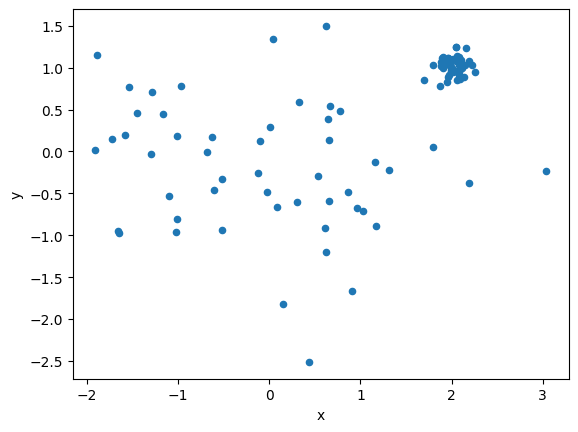

In [ ]:
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=50, centers=[[0,0]], n_features=2,  cluster_std = 1)
df = pd.DataFrame(X, columns=['x', 'y'])

X, _ = make_blobs(n_samples=50, centers=[[2,1]], n_features=2,  cluster_std = 0.1)
df2 = pd.DataFrame(X, columns=['x', 'y'])

df = pd.concat([df, df2], axis=0)

df.plot.scatter(x='x', y='y')

## Cluster Analysis - Hierarchical

In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster

n_clusters = 2

Z =
df['cluster_labels'] =

sns.scatterplot(df, )

Plot the dendrogram

In [ ]:
from scipy.cluster.hierarchy import dendrogram
_ =

## Cluster Analysis - Kmeans

Let's compare the hierarchial clustering result with k-means

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
df_kmeans = df.drop('cluster_labels', axis=1)

Find the cluster centroids

In [ ]:
# Try with random or specific initializations.
kmeans_result =

In [ ]:
# where are the centroids?
kmeans_result.

Assign each point to its cluster

In [ ]:
df_kmeans['cluster_labels'] =

Plot the clustering

In [ ]:
import matplotlib.pyplot as plt

# Plot clusters
sns.scatterplot(, data=df_kmeans)

#plot centroids
plt.scatter(, color='red', marker='x')

# Show the plot with the new points
plt.show()

## Let's try 3D data

Let's create some 3D data and use it for k-means using.

In [ ]:
import numpy as np

# First distribution

num_samples = 100
centers = [[0, 0, 0]]
cluster_std = [[1, np.sqrt(2), 1]]

samples, _ = make_blobs(n_samples=num_samples, centers=centers, cluster_std=cluster_std, n_features=3)

In [ ]:
# Second distribution

num_samples = 100
centers = [[3, 3, 3]]
cluster_std = [[np.sqrt(2), 1, 1]]

samples2, _ = make_blobs(n_samples=num_samples, centers=centers, cluster_std=cluster_std, n_features=3)

In [ ]:
# Third distribution

num_samples = 150
centers = [[5, 5, 5]]
cluster_std = [[0.5,1,0.5]]

samples3, _ = make_blobs(n_samples=num_samples, centers=centers, cluster_std=cluster_std, n_features=3)

Let's put all samples together in a dataframe

In [ ]:
df_3d = pd.DataFrame(samples, columns=['x', 'y', 'z'])
df_3d = pd.concat([df_3d, pd.DataFrame(samples2, columns=['x', 'y', 'z'])], axis=0)
df_3d = pd.concat([df_3d, pd.DataFrame(samples3, columns=['x', 'y', 'z'])], axis=0)

In [ ]:
df_3d

Let's [plot it](https://plotly.com/python/3d-scatter-plots/) in 3D.

In [ ]:
import plotly.express as px

fig = px.scatter_3d(df_3d, )
fig.update_traces(marker_size = 3) # makes the points smaller (better visualization)
fig.show()

Let's try some hierarchical clustering

In [ ]:
Z =
df_3d['cluster_labels'] =

In [ ]:
fig = px.scatter_3d(df_3d, )
fig.update_traces(marker_size = 3) # makes the points smaller (better visualization)
fig.show()

Let's try k-means

In [ ]:
kmeans_model =
kmeans_result =

In [ ]:
df_3d['cluster_labels'] =
df_3d

In [ ]:
fig = px.scatter_3d(df_3d, )
fig.update_traces(marker_size = 3)
fig.show()

##Let's find the best number of clusters using both silouette and inertia.

We will use [`yellowbrick`](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html)

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

visualizer =

visualizer.
visualizer.show()

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

visualizer =

visualizer.
visualizer.show()

###Let's visualize the silouette figure for 3 clusters

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

kmeans_model =
visualizer =

visualizer.
visualizer.show()        # Finalize and render the figure

##Things we could try:


1.   What if we make the data non-Gaussian? Try [generating swiss rolls or curves](https://scikit-learn.org/1.5/datasets/sample_generators.html#generators-for-manifold-learning).
2.   Trying different densities, sizes, number of clusters, initialization, etc.
